In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [4]:
data_QN = pd.read_csv("/content/drive/MyDrive/NYC Building Data/QN.csv")

In [5]:
data_QN.columns

Index(['Borough', 'Block', 'Lot', 'CD', 'CT2010', 'CB2010', 'SchoolDist',
       'Council', 'ZipCode', 'FireComp', 'PolicePrct', 'HealthArea',
       'SanitBoro', 'SanitDistrict', 'SanitSub', 'Address', 'ZoneDist1',
       'ZoneDist2', 'ZoneDist3', 'ZoneDist4', 'Overlay1', 'Overlay2',
       'SPDist1', 'SPDist2', 'SPDist3', 'LtdHeight', 'SplitZone', 'BldgClass',
       'LandUse', 'Easements', 'OwnerType', 'OwnerName', 'LotArea', 'BldgArea',
       'ComArea', 'ResArea', 'OfficeArea', 'RetailArea', 'GarageArea',
       'StrgeArea', 'FactryArea', 'OtherArea', 'AreaSource', 'NumBldgs',
       'NumFloors', 'UnitsRes', 'UnitsTotal', 'LotFront', 'LotDepth',
       'BldgFront', 'BldgDepth', 'Ext', 'ProxCode', 'IrrLotCode', 'LotType',
       'BsmtCode', 'AssessLand', 'AssessTot', 'ExemptLand', 'ExemptTot',
       'YearBuilt', 'YearAlter1', 'YearAlter2', 'HistDist', 'Landmark',
       'BuiltFAR', 'ResidFAR', 'CommFAR', 'FacilFAR', 'BoroCode', 'BBL',
       'CondoNo', 'Tract2010', 'XCoord', 'YCoo

In [6]:
data_QN = data_QN[['ZipCode','Address','BldgClass','LandUse',
                   'OwnerType','OwnerName','LotArea','BldgArea',
                   'ComArea','ResArea','OfficeArea', 'RetailArea', 'GarageArea', 
                   'StrgeArea','FactryArea', 'OtherArea','NumFloors', 'UnitsRes','UnitsTotal','YearBuilt',
                   'YearAlter1', 'YearAlter2','BuiltFAR','CommFAR','XCoord', 'YCoord']]
data_QN.head(5)

,ZipCode,Address,BldgClass,LandUse,OwnerType,OwnerName,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,NumFloors,UnitsRes,UnitsTotal,YearBuilt,YearAlter1,YearAlter2,BuiltFAR,CommFAR,XCoord,YCoord
0,11101.0,2 STREET,Q1,9.0,C,DEPT OF GENERAL SERVI,1684828,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.00,0.0,NaN,NaN
1,11101.0,2 STREET,U2,7.0,P,NORCEM PROPERTIES INC,21139,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.00,0.0,995513.0,209421.0
2,11101.0,1-50 51 AVENUE,W1,8.0,C,NYC DEPT OF EDUCATION,33454,136108,136108,0,0,0,0,0,0,0,5.0,0,1,2011,2011,0,4.07,0.0,995477.0,209867.0
3,11101.0,2 STREET,V0,11.0,C,HOUSING PRESERVATION,28703,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.00,0.0,NaN,NaN
4,11101.0,2 STREET,V0,11.0,C,HOUSING PRESERVATION,75847,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.00,0.0,NaN,NaN


In [7]:
# Check percentage of null data
(data_QN.isnull().sum()/len(data_QN)*100)

ZipCode        0.408443
Address        0.053637
BldgClass      0.052712
LandUse        0.222254
OwnerType     92.889400
OwnerName      0.477493
LotArea        0.000000
BldgArea       0.000000
ComArea        0.000000
ResArea        0.000000
OfficeArea     0.000000
RetailArea     0.000000
GarageArea     0.000000
StrgeArea      0.000000
FactryArea     0.000000
OtherArea      0.000000
NumFloors      0.000000
UnitsRes       0.000000
UnitsTotal     0.000000
YearBuilt      0.000000
YearAlter1     0.000000
YearAlter2     0.000000
BuiltFAR       0.000000
CommFAR        0.000000
XCoord         2.639926
YCoord         2.639926
dtype: float64

In [8]:
data_QN["OwnerType"].unique()

array(['C', 'P', nan, 'X', 'O', 'M'], dtype=object)

    - C City Ownership
    - M Mixed City & Private Ownership
    - O Other – Public Authority, State or Federal Ownership
    - P Private Ownership – Either the tax lot has started an “in rem action or it was once city owned.
    - X Mixed (Excludes property with a C, M, O, or P ownership code). 
    Fully tax exempt property that could be owned by the city, state, or federal government; a public authority; or a private institution
    - blank Unknown (Usually Private Ownership)

In [9]:
# Rename NULL in OwnerType as UNK indicates an unknown ownership, we don't drop NULL here because it is not a mistake
data_QN["OwnerType"] = data_QN["OwnerType"].fillna("UNK").astype('category')
data_QN["OwnerType"] = data_QN["OwnerType"].cat.reorder_categories(['P', 'C', 'X', 'O', 'M', 'UNK'])

In [10]:
# Because the other NULL value is only ~1%, we decide to drop it for now
data_QN.dropna(inplace=True)

In [11]:
# Drop value(s) with coordinates 0
data_QN = data_QN[data_QN['XCoord'] != 0]

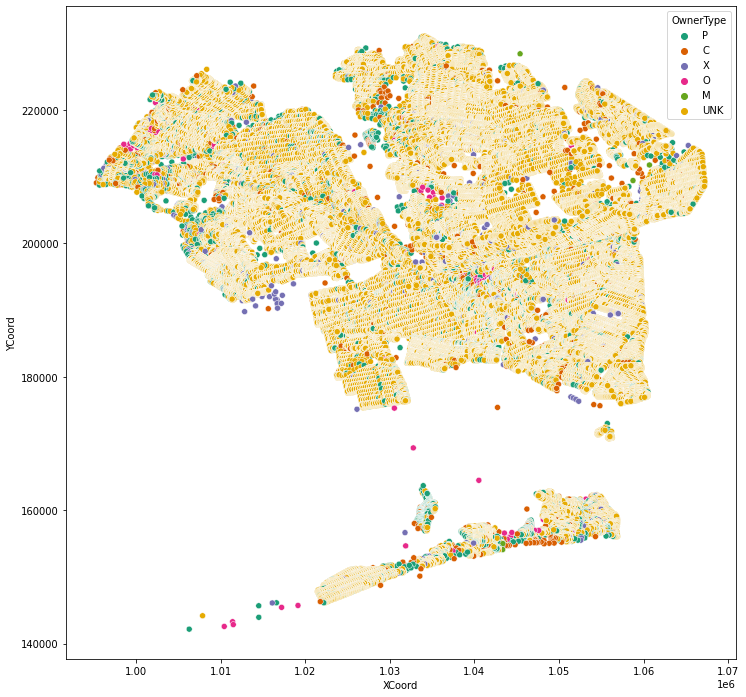

In [12]:
# Distribution of property by OwnerType
plt.figure(figsize=(12,12))
sns.scatterplot(x='XCoord', y = 'YCoord', data=data_QN, hue='OwnerType', palette='Dark2');

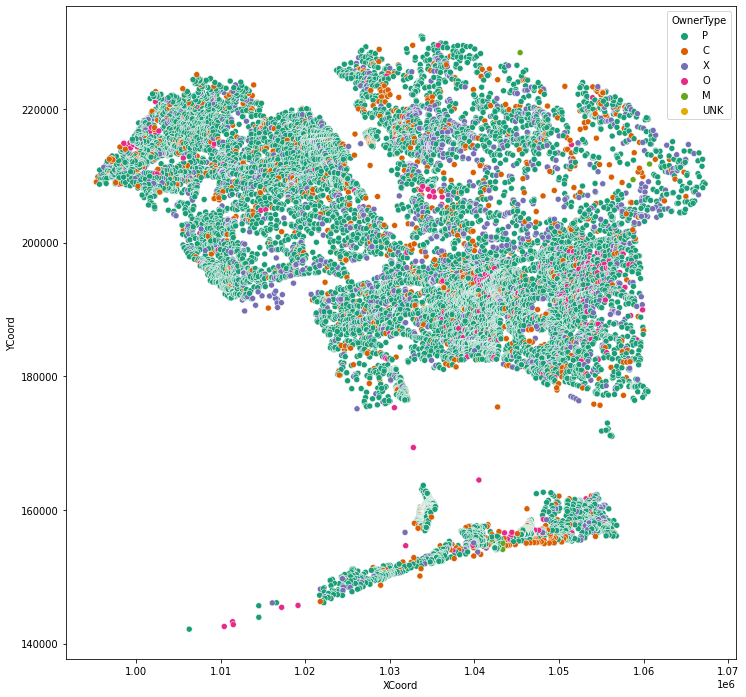

In [13]:
# Distribution of property by OwnerType (UNK excluded)
plt.figure(figsize=(12,12))
sns.scatterplot(x='XCoord', y = 'YCoord', data=data_QN[data_QN['OwnerType'] != 'UNK'], hue='OwnerType', palette='Dark2');

    - 01 One &Two Family Buildings
    - 02 Multi-Family Walk-Up Buildings
    - 03 Multi-Family Elevator Buildings
    - 04 Mixed Residential & Commercial Buildings
    - 05 Commercial & Office Buildings
    - 06 Industrial & Manufacturing
    - 07 Transportation & Utility
    - 08 Public Facilities & Institutions
    - 09 Open Space & Outdoor Recreation
    - 10 Parking Facilities
    - 11 Vacant Land

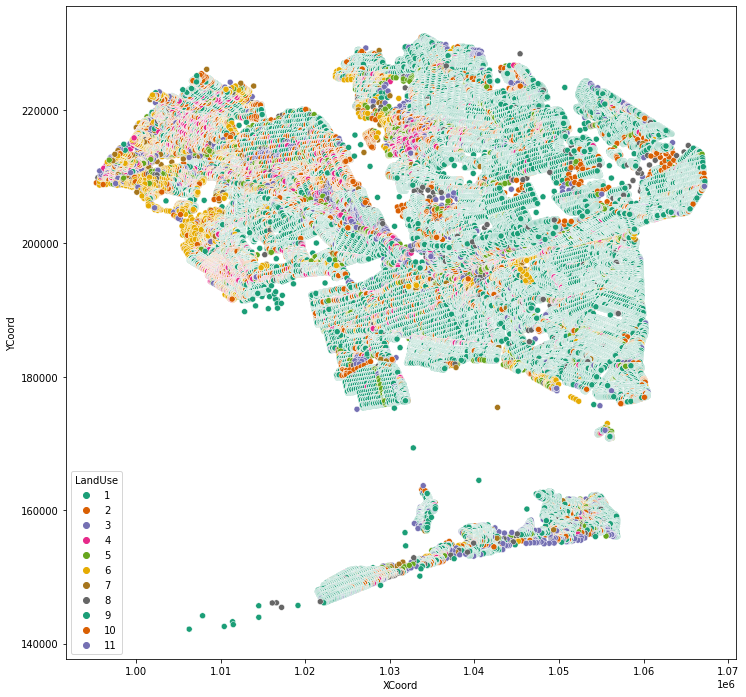

In [14]:
# Distribution of property by LandUse
plt.figure(figsize=(12,12))
data_QN['LandUse'] = data_QN['LandUse'].astype('int').astype('category')
sns.scatterplot(x='XCoord', y = 'YCoord', data=data_QN, hue='LandUse', palette='Dark2');

**Investigate YearBuilt**

In [15]:
# Check how many building with unknown YearBuilt
sum(data_QN['YearBuilt'] == 0)/len(data_QN['YearBuilt'])*100

1.4958149008624804

In [16]:
# Because it is only about 1.5%, I think we can remove that observation for now
data_QN_nonZero = data_QN[data_QN['YearBuilt'] != 0]
# Create Age variable by substracting current year with YearBuilt
data_QN_nonZero['Age'] = 2021 - data_QN_nonZero['YearBuilt']

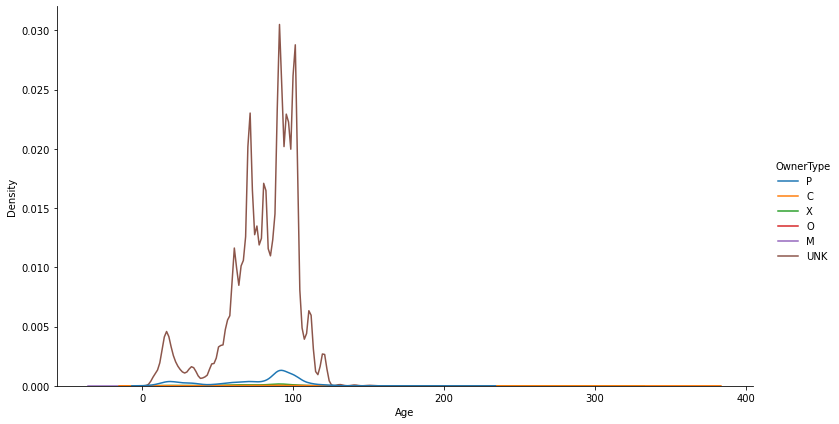

In [17]:
sns.displot(data=data_QN_nonZero, x='Age', hue='OwnerType', kind='kde', height=6, aspect=1.8);

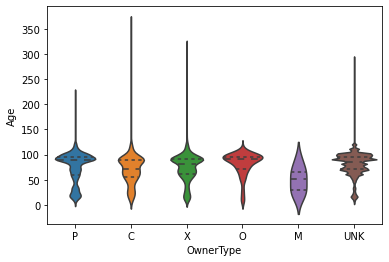

In [18]:
sns.violinplot(x='OwnerType', y='Age', data=data_QN_nonZero, inner="quartile")

In [19]:
data_QN_nonZero.head()

,ZipCode,Address,BldgClass,LandUse,OwnerType,OwnerName,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,NumFloors,UnitsRes,UnitsTotal,YearBuilt,YearAlter1,YearAlter2,BuiltFAR,CommFAR,XCoord,YCoord,Age
2,11101.0,1-50 51 AVENUE,W1,8,C,NYC DEPT OF EDUCATION,33454,136108,136108,0,0,0,0,0,0,0,5.0,0,1,2011,2011,0,4.07,0.0,995477.0,209867.0,10
13,11101.0,2-02 54 AVENUE,E1,6,P,HDH LLC,329600,183797,183797,0,30210,0,0,0,153587,0,3.0,0,2,1940,2011,1995,0.56,0.0,995672.0,208752.0,81
18,11101.0,5-35 54 AVENUE,E9,6,P,ANOROC REALTY INC,83712,84760,84760,0,11000,0,0,0,73760,0,2.0,0,7,1962,1981,0,1.01,2.0,996374.0,209093.0,59
20,11101.0,2-39 54 AVENUE,F2,6,UNK,DRAGON DEVELOPMENT LL,61268,59022,59022,0,8652,0,0,0,50370,0,1.0,0,1,1962,1981,0,0.96,2.0,995950.0,209180.0,59
21,11101.0,52-37 2 STREET,E1,6,UNK,52-35 SECOND LLC,26237,13500,13500,0,2350,0,4500,6650,0,0,1.0,0,2,1968,0,0,0.51,2.0,995674.0,209231.0,53


**How many building was altered since it was built?**

In [20]:
# Only use the latest YearAlter
# Note: This code a bit inefficient, should be another way that could process faster
tmp = []
for i in range(0,len(data_QN_nonZero)):
  YearAlter1 = data_QN_nonZero.iloc[i]['YearAlter1']
  YearAlter2 = data_QN_nonZero.iloc[i]['YearAlter2']
  if YearAlter2 == 0:
    tmp.append(YearAlter1)
  else:
    tmp.append(YearAlter2)

In [21]:
data_QN_nonZero['YearAlter'] = tmp

In [22]:
# Only 7% is altered since it was built!
sum(data_QN_nonZero['YearAlter'] != 0)/len(data_QN_nonZero['YearAlter'])*100

7.015282220283674

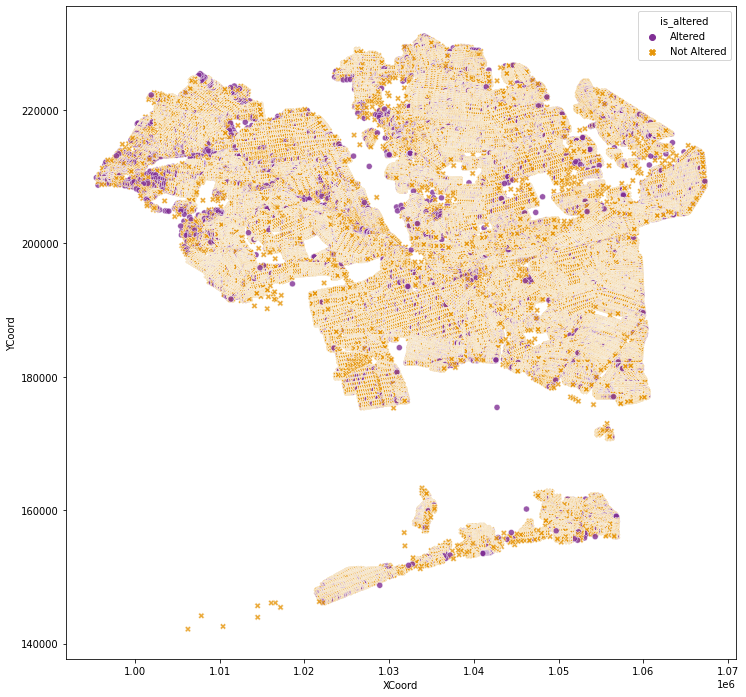

In [23]:
# Distribution of property that already altered
plt.figure(figsize=(12,12))
data_QN_nonZero['is_altered'] = np.where(data_QN_nonZero['YearAlter']== 0, "Not Altered", "Altered")
sns.scatterplot(x='XCoord', y = 'YCoord', data=data_QN_nonZero, hue='is_altered', style='is_altered', palette='CMRmap',alpha=0.8);

In [24]:
data_QN_nonZero['ZipCode'] = data_QN_nonZero['ZipCode'].astype('int').astype('category')
pd.pivot_table(data_QN_nonZero, values=['Age'], 
                     index=['ZipCode'], aggfunc=[np.mean, np.median, np.std]).transpose()

,ZipCode,11001,11004,11005,11040,11101,11102,11103,11104,11105,11106,11109,11354,11355,11356,11357,11358,11360,11361,11362,11363,11364,11365,11366,11367,11368,11369,11370,11372,11373,11374,11375,11377,11378,11379,11385,11411,11412,11413,11414,11415,11416,11417,11418,11419,11420,11421,11422,11423,11426,11427,11428,11429,11430,11432,11433,11434,11435,11436,11691,11692,11693,11694,11695,11697
mean,Age,73.651240,69.108995,49.0,67.908163,86.778261,84.452415,86.025600,87.141573,85.621546,83.472387,16.000000,70.131850,72.255082,74.178307,70.655779,78.194719,61.844553,75.014168,67.881522,78.435138,70.271701,70.851509,74.624725,73.074082,77.017760,81.537192,71.918195,86.201693,76.959994,79.674930,83.794568,78.100527,83.317533,78.711674,95.085392,77.795276,85.542770,76.082714,65.77912,86.191903,90.572973,86.236139,97.235768,94.024024,85.100022,99.324846,71.855803,86.113096,80.316906,77.468171,91.874010,85.056296,40.375000,83.197481,76.648621,75.704568,85.681726,83.354703,64.908561,50.458065,81.551592,80.558948,91.666667,92.000000
median,Age,71.000000,71.000000,49.0,71.000000,90.000000,91.000000,93.000000,91.000000,91.000000,91.000000,13.000000,71.000000,71.000000,86.000000,71.000000,81.000000,61.000000,76.000000,71.000000,91.000000,71.000000,71.000000,76.000000,76.000000,91.000000,87.000000,71.000000,91.000000,81.000000,82.000000,86.000000,81.000000,91.000000,81.000000,96.000000,76.000000,91.000000,81.000000,61.00000,96.000000,101.000000,91.000000,101.000000,101.000000,91.000000,101.000000,71.000000,96.000000,81.000000,81.000000,96.000000,91.000000,41.500000,90.000000,91.000000,86.000000,96.000000,91.000000,71.000000,56.000000,91.000000,91.000000,92.000000,83.000000
std,Age,14.768319,11.052069,NaN,10.771994,28.757452,27.519178,22.847588,12.188659,19.429534,25.153238,7.937254,26.652172,24.879696,30.890310,20.952994,19.718831,17.584313,22.116631,21.364666,23.042686,14.344065,16.028270,13.595785,12.396075,32.328079,22.016038,18.272037,17.439729,26.199540,16.895837,16.907974,23.605356,23.340452,18.103742,16.902601,9.650409,16.920534,21.236109,19.52920,25.951418,23.537798,19.681314,18.374413,18.605984,20.206632,15.956420,20.009157,20.579358,14.324791,17.090859,13.319497,17.060436,21.433868,22.578500,30.720334,25.270914,23.904905,21.578360,31.352726,35.385802,30.255112,24.189298,29.501412,24.024987


**Now we will investigate distribution of LandUse and OwnerType with other variables**

In [25]:
pd.pivot_table(data_QN, values=['LotArea','BldgArea','ComArea','ResArea','OfficeArea','RetailArea','GarageArea','StrgeArea','FactryArea', 'OtherArea'], 
                     index=['LandUse'], aggfunc=[np.mean, np.median])

mean                              ...  median                     
              BldgArea       ComArea    FactryArea  ... ResArea RetailArea StrgeArea
LandUse                                             ...                             
1          1701.681892      0.028074      0.000000  ...    1560        0.0         0
2          4797.503494     21.509789      0.000000  ...    3060        0.0         0
3        112758.905628   3107.190449     66.714042  ...   69677        0.0         0
4          6971.772189   2131.788388     21.176912  ...    1713     1089.0         0
5         11886.622312  10793.997974     79.481926  ...       0     2143.5         0
6         20343.676294  20290.185559  10043.526158  ...       0        0.0         0
7         32212.751613  31957.745161     27.419355  ...       0        0.0         0
8         34457.535110  33692.342456    218.014404  ...       0        0.0         0
9         27587.130667  25111.874667      0.000000  ...       0        0.0         0
10         3347.327575   3219.062186     61.216394  ...       0        0.0         0
11            0.000000      0.000000      0.000000  ...       0        0.0         0

[11 rows x 20 columns]

In [26]:
pd.pivot_table(data_QN, values=['LotArea','BldgArea','ComArea','ResArea','OfficeArea','RetailArea','GarageArea','StrgeArea','FactryArea', 'OtherArea'], 
                     index=['OwnerType'], aggfunc=[np.mean, np.median])

mean                 ...     median          
                BldgArea        ComArea  ... RetailArea StrgeArea
OwnerType                                ...                     
P           11345.875141    5594.748099  ...          0         0
C           56725.494561   56176.456904  ...          0         0
X           20725.941579   13264.033775  ...          0         0
O           62376.516575   18863.301105  ...          0         0
M          100681.153846  100681.153846  ...          0         0
UNK          2857.822584     403.205626  ...          0         0

[6 rows x 20 columns]

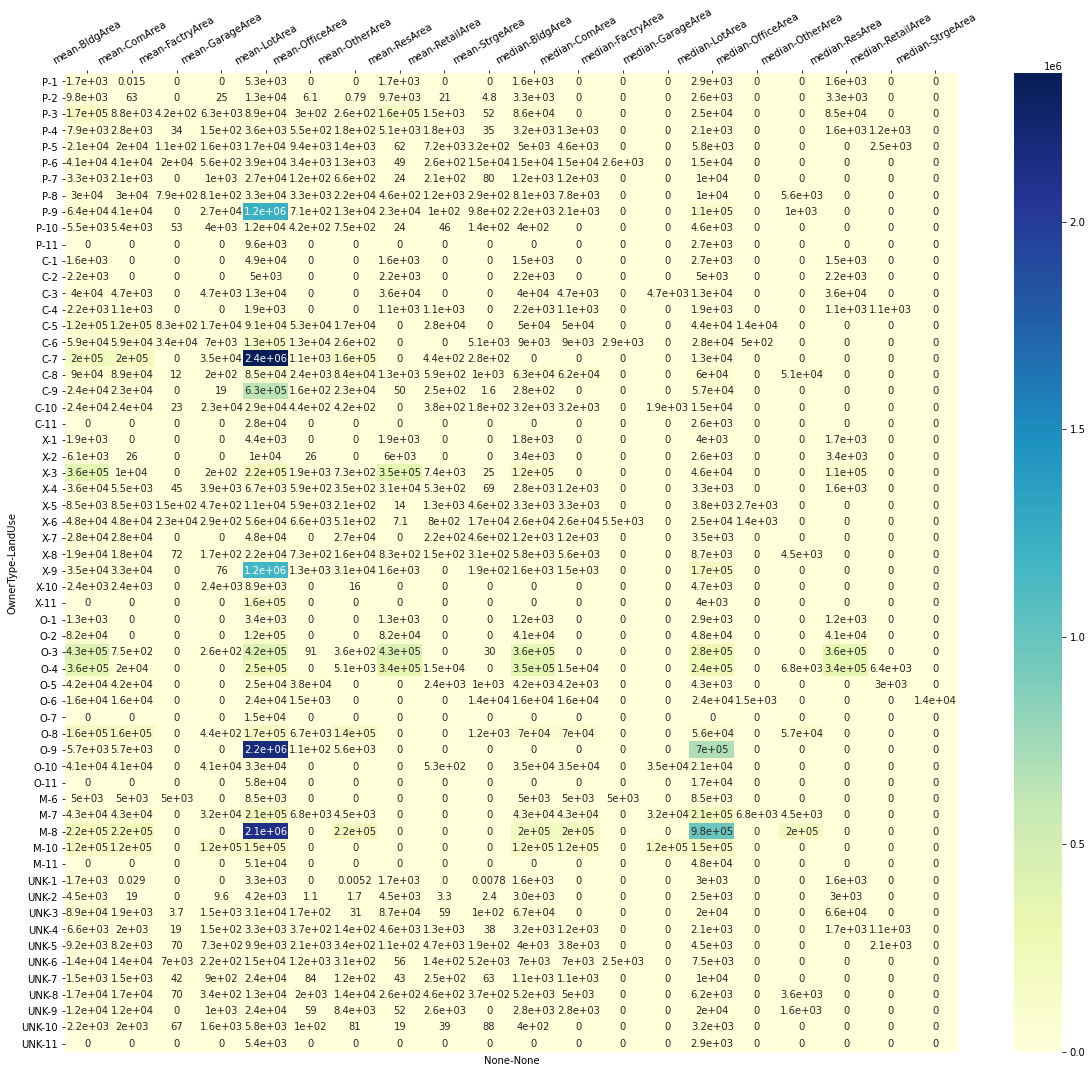

In [27]:
tab = pd.pivot_table(data_QN, values=['LotArea','BldgArea','ComArea','ResArea','OfficeArea','RetailArea','GarageArea','StrgeArea','FactryArea', 'OtherArea'], 
                     index=['OwnerType','LandUse'], aggfunc=[np.mean, np.median])
plt.figure(figsize=(20,18))
ax = sns.heatmap(tab, annot=True, cmap="YlGnBu");
ax.xaxis.tick_top()
plt.xticks(rotation=30);

**Save Cleaned Version**

  - Renamed NAN in OwnerType as UNK
  - Drop NULL values for the rest of variables (only ~1%)

In [28]:
data_QN.to_csv("data_QN_cleaned.csv", index=False)